In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from pathlib import Path
import os

import os
from PIL import Image

# Function to convert all images to JPG format
def convert_to_jpg(source_dir, dest_dir):
    # Create the destination directory 
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    # Iterate through files in the source directory
    for filename in os.listdir(source_dir):
        if filename.endswith(".JPEG") or filename.endswith(".JPG") or filename.endswith(".jpeg") or filename.endswith(".jpg"):
            # Open the image
            image_path = os.path.join(source_dir, filename)
            image = Image.open(image_path)
            
            # Convert to JPG format
            jpg_filename = os.path.splitext(filename)[0] + ".jpg"
            jpg_path = os.path.join(dest_dir, jpg_filename)
            image.convert("RGB").save(jpg_path, "JPEG")
            
            print(f"Converted {filename} to JPG")

# Source and destination directories
source_directory = r"
destination_directory = r"

# Convert images to JPG and save to the destination directory
convert_to_jpg(source_directory, destination_directory)


In [2]:

# Load data
image_dir = Path(r"C:\Users\net pc\Desktop\Training Datsets")




In [3]:
#Ensure that the path you provided exists. You can check this by using
image_dir = Path(r"C:\Users\net pc\Desktop\Training Datsets")

if image_dir.exists():
    print("Path exists.")
else:
    print("Path does not exist.")

Path exists.


In [4]:
filepaths = list(image_dir.glob(r'*/*.JPG'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

image_df = pd.concat([filepaths, labels], axis=1)


In [5]:
image_df

,Filepath,Label
0,C:\Users\net pc\Desktop\Training Datsets\gliom...,glioma_tumors
1,C:\Users\net pc\Desktop\Training Datsets\gliom...,glioma_tumors
2,C:\Users\net pc\Desktop\Training Datsets\gliom...,glioma_tumors
3,C:\Users\net pc\Desktop\Training Datsets\gliom...,glioma_tumors
4,C:\Users\net pc\Desktop\Training Datsets\gliom...,glioma_tumors
...,...,...
9995,C:\Users\net pc\Desktop\Training Datsets\pitui...,pituitary_tumors
9996,C:\Users\net pc\Desktop\Training Datsets\pitui...,pituitary_tumors
9997,C:\Users\net pc\Desktop\Training Datsets\pitui...,pituitary_tumors
9998,C:\Users\net pc\Desktop\Training Datsets\pitui...,pituitary_tumors


In [6]:
train_df, test_df = train_test_split(image_df, train_size=0.80, shuffle=True, random_state=1)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:

# Define ImageDataGenerator for train and test sets
train_generator = ImageDataGenerator(rescale=1./255,
                                     horizontal_flip=True,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     validation_split=0.2)

test_generator = ImageDataGenerator(rescale=1./255)



In [9]:

# Generate data flows
train_images = train_generator.flow_from_dataframe(dataframe=train_df,
                                                   x_col='Filepath',
                                                   y_col='Label',
                                                   target_size=(64, 64),
                                                   color_mode='rgb',
                                                   class_mode='categorical',  
                                                   batch_size=32,
                                                   shuffle=True,
                                                   seed=42,
                                                   subset='training')

val_images = train_generator.flow_from_dataframe(dataframe=train_df,
                                                 x_col='Filepath',
                                                 y_col='Label',
                                                 target_size=(64, 64),
                                                 color_mode='rgb',
                                                 class_mode='categorical', 
                                                 batch_size=32,
                                                 shuffle=True,
                                                 seed=42,
                                                 subset='validation')

test_images = test_generator.flow_from_dataframe(dataframe=test_df,
                                                 x_col='Filepath',
                                                 y_col='Label',
                                                 target_size=(64, 64),
                                                 color_mode='rgb',
                                                 class_mode='categorical',  
                                                 batch_size=32,
                                                 shuffle=False)

Found 6400 validated image filenames belonging to 4 classes.
Found 1600 validated image filenames belonging to 4 classes.
Found 2000 validated image filenames belonging to 4 classes.


In [10]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

def create_model(input_shape, num_classes):
    model = Sequential()

    # Mixed-Scale Dense Convolution Layer
    model.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu", input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Self-Attention Mechanism
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Hierarchical Feature Fusion
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Attention-Based Contextual Information
    model.add(Flatten())
    model.add(Dense(units=64, activation="relu"))
    model.add(Dropout(0.25))
    
    # Additional Fully Connected Layers
    model.add(Dense(units=128, activation="relu"))
    model.add(Dropout(0.25))
    model.add(Dense(units=64, activation="relu"))
    model.add(Dropout(0.25))
    model.add(Dense(units=32, activation="relu"))
    model.add(Dropout(0.25))
    model.add(Dense(units=16, activation="relu"))
    model.add(Dropout(0.25))

    # Output layer
    model.add(Dense(units=num_classes, activation="softmax"))

    return model

# Assuming input_shape is (64, 64, 3) and num_classes is 4 for your multi-class problem
input_shape = (64, 64, 3)
num_classes = 4
model = create_model(input_shape, num_classes)



C:\Users\Public\Efendim\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 60, 60, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         294,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 411,668 (1.57 MB)

 Trainable params: 411,668 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Compile the model
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            patience=3
        )
    ]
)


Epoch 1/50


C:\Users\Public\Efendim\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


200/200 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - accuracy: 0.2583 - loss: 1.3869 - val_accuracy: 0.2600 - val_loss: 1.3838 - learning_rate: 1.0000e-04
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.2704 - loss: 1.3842 - val_accuracy: 0.2525 - val_loss: 1.3802 - learning_rate: 1.0000e-04
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.2682 - loss: 1.3824 - val_accuracy: 0.3088 - val_loss: 1.3799 - learning_rate: 1.0000e-04
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.2792 - loss: 1.3820 - val_accuracy: 0.2900 - val_loss: 1.3707 - learning_rate: 1.0000e-04
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.2749 - loss: 1.3756 - val_accuracy: 0.3638 - val_loss: 1.3572 - learning_rate: 1.0000e-04
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.3150 - loss: 1.3607 - val_accuracy: 0.4256 - val_loss: 1.3275 - learning_rate: 1.0000e-04
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - accurac

200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.7875 - loss: 0.5817 - val_accuracy: 0.8388 - val_loss: 0.4618 - learning_rate: 1.0000e-04
Epoch 44/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.7803 - loss: 0.5875 - val_accuracy: 0.8238 - val_loss: 0.4740 - learning_rate: 1.0000e-04
Epoch 45/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - accuracy: 0.7903 - loss: 0.5748 - val_accuracy: 0.8381 - val_loss: 0.4791 - learning_rate: 1.0000e-04
Epoch 46/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.7957 - loss: 0.5553 - val_accuracy: 0.8356 - val_loss: 0.4551 - learning_rate: 1.0000e-04
Epoch 47/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.7968 - loss: 0.5629 - val_accuracy: 0.8256 - val_loss: 0.4713 - learning_rate: 1.0000e-04
Epoch 48/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - accuracy: 0.7935 - loss: 0.5762 - val_accuracy: 0.8325 - val_loss: 0.4717 - learning_rate: 1.0000e-04
Epoch 49/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - a

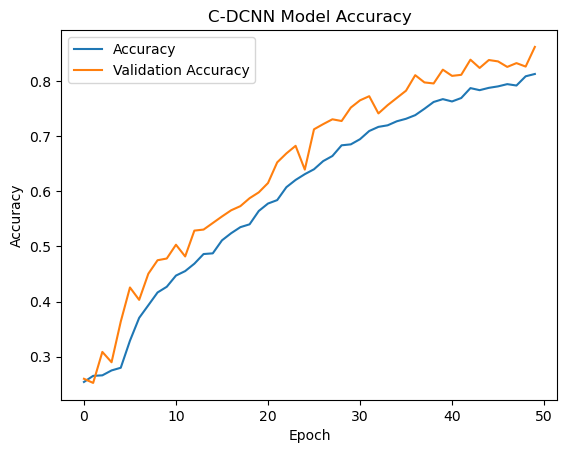

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('C-DCNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Validation Accuracy', 'loss', 'Validation Loss'])
plt.show()

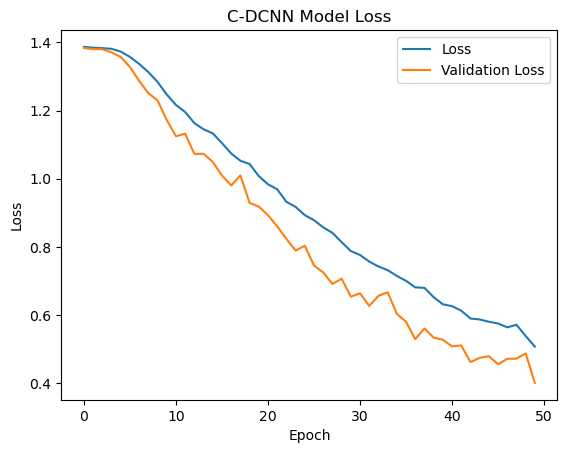

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('C-DCNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [15]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.37037
Test Accuracy: 86.30%


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step


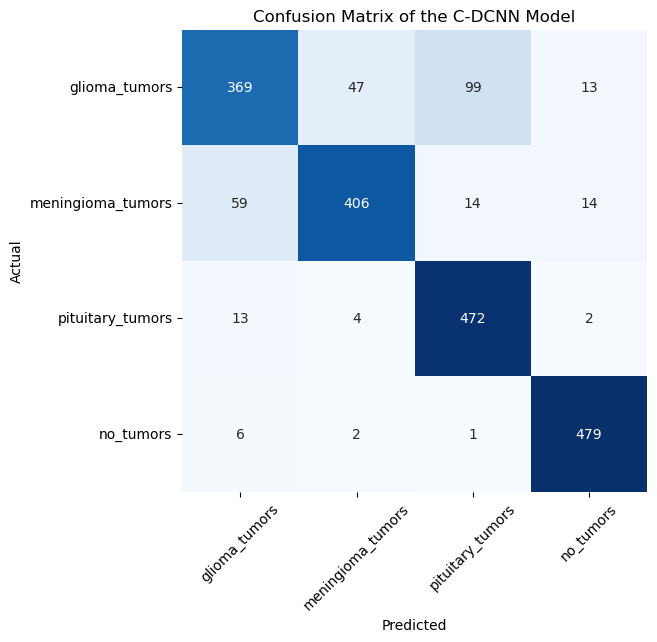

Classification Report:
----------------------
                    precision    recall  f1-score   support

    glioma_tumors       0.83      0.70      0.76       528
meningioma_tumors       0.88      0.82      0.85       493
 pituitary_tumors       0.81      0.96      0.88       491
        no_tumors       0.94      0.98      0.96       488

         accuracy                           0.86      2000
        macro avg       0.86      0.87      0.86      2000
     weighted avg       0.86      0.86      0.86      2000



In [16]:
# Convert labels to one-hot encoding
from keras.utils import to_categorical

test_labels_onehot = to_categorical(test_images.labels, num_classes=4)

# Predict classes
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Create confusion matrix
cm = confusion_matrix(np.argmax(test_labels_onehot, axis=1), predicted_classes)

# Create classification report
clr = classification_report(np.argmax(test_labels_onehot, axis=1), predicted_classes, target_names=["glioma_tumors", "meningioma_tumors", "pituitary_tumors", "no_tumors"])

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(4) + 0.5, labels=["glioma_tumors", "meningioma_tumors", "pituitary_tumors", "no_tumors"], rotation=45)
plt.yticks(ticks=np.arange(4) + 0.5, labels=["glioma_tumors", "meningioma_tumors", "pituitary_tumors", "no_tumors"], rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of the C-DCNN Model")
plt.show()

# Print classification report
print("Classification Report:\n----------------------\n", clr)


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step


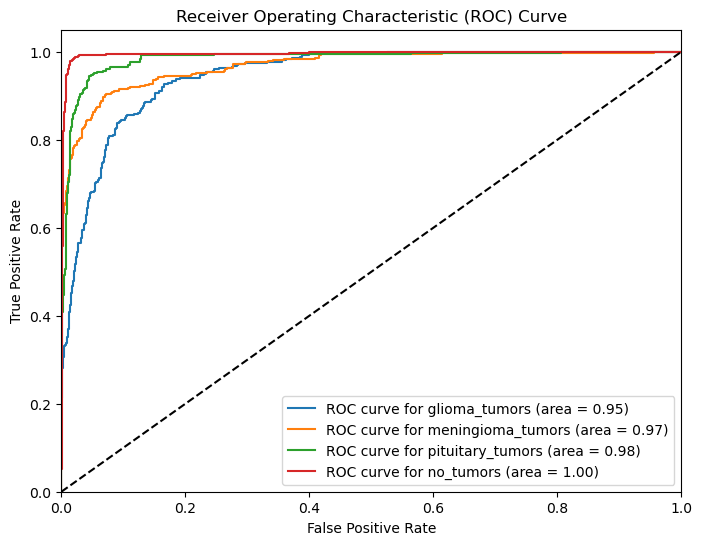

AUC ROC for glioma_tumors: 0.94715
AUC ROC for meningioma_tumors: 0.96831
AUC ROC for pituitary_tumors: 0.98451
AUC ROC for no_tumors: 0.99549


In [17]:
# Obtain predicted probabilities
predicted_probabilities = model.predict(test_images)

# Import necessary libraries
from sklearn.metrics import roc_auc_score, roc_curve

# Convert labels to one-hot encoding
from keras.utils import to_categorical
test_labels_onehot = to_categorical(test_images.labels, num_classes=4)

# Compute AUC ROC for each class
auc_roc = dict()
for i in range(4):
    auc_roc[i] = roc_auc_score(test_labels_onehot[:, i], predicted_probabilities[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(4):
    fpr, tpr, _ = roc_curve(test_labels_onehot[:, i], predicted_probabilities[:, i])
    plt.plot(fpr, tpr, label='ROC curve for {} (area = {:.2f})'.format(["glioma_tumors", "meningioma_tumors", "pituitary_tumors", "no_tumors"][i], auc_roc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC ROC for each class
for i in range(4):
    print("AUC ROC for {}: {:.5f}".format(["glioma_tumors", "meningioma_tumors", "pituitary_tumors", "no_tumors"][i], auc_roc[i]))
